# END CAPSTONE ( RESUME PARSER )

# PYTHON SCRIPT THAT USES LIBRARIES LIKE PYPDF2 OR DOCX TO EXTRACT TEXT FROM PDF AND DOCX RESUME FILES




In [ ]:
# INSTALLING REQUIRED LIBRARIES FOR EXTRACTION
!pip install python-docx
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 11.1 MB/s eta 0:00:00


* EXTRACTING TEXT FROM THE DOCUMENT OR PDF FILE


In [ ]:
import os
import re
import PyPDF2
import docx
import openpyxl

# FUNCTION TO EXTRACT TEXT FROM PDF FILES
def extract_text_from_pdf(file_path):
    text = ""
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
    return text

# FUNCTION TO EXTRACT TEXT FROM DOCX FILES
def extract_text_from_docx(file_path):
    doc = docx.Document(file_path)
    text = "\n".join([para.text for para in doc.paragraphs])
    return text


* EXTRACTING IMPORTANT DETAILS FROM THE RESUME

In [ ]:
# FUNCTION TO EXTRACT NAME
def extract_name(text):
    # LOOK FOR THE NAME ASSUMING IT APPEARS AT THE START OF THE RESUME
    name_match = re.search(r'([A-Z][a-z]+\s[A-Z][a-z]+)', text)
    if name_match:
        return name_match.group(0)
    return "Name Not Found"

# FUNCTION TO EXTRACT EMAIL ADDRESS
def extract_email(text):
    email_match = re.search(r'[\w\.-]+@[\w\.-]+', text)
    if email_match:
        return email_match.group(0)
    return "Email Not Found"

# FUNCTION TO EXTRACT PHONE NUMBER
def extract_phone(text):
    phone_match = re.search(r'(\(\d{3}\)\s*\d{3}-\d{4})', text)
    if phone_match:
        return phone_match.group(0)
    return "Phone Number Not Found"

# FUNCTION TO EXTRACT SKILLS
def extract_skills(text):
    skill_match = re.search(r'Skills:?\s*(.*)', text, re.IGNORECASE)
    if skill_match:
        return skill_match.group(1).strip()
    return "Skills Not Found"

# FUNCTION TO EXTRACT EXPERIENCE
def extract_experience(text):
    experience_match = re.search(r'Experience:?\s*(.*?)Education:', text, re.DOTALL | re.IGNORECASE)
    if experience_match:
        return experience_match.group(1).strip()
    return "Experience Not Found"

# FUNCTION TO EXTRACT EDUCATION
def extract_education(text):
    education_match = re.search(r'Education:?\s*(.*)', text, re.IGNORECASE)
    if education_match:
        return education_match.group(1).strip()
    return "Education Not Found"


* CREATING FUNCTION TO PARSE RESUME DATA INTO EXCEL SHEET

In [ ]:
# FUNCTION TO PARSE RESUMES AND WRITE TO EXCEL
def parse_and_write_to_excel(input_folder, output_excel):
    # CREATE A NEW EXCEL WORKBOOK
    workbook = openpyxl.Workbook()
    sheet = workbook.active
    sheet.title = "Resumes"

    # SET COLUMN HEADERS
    sheet['A1'] = "Name"
    sheet['B1'] = "Email"
    sheet['C1'] = "Phone"
    sheet['D1'] = "Skills"
    sheet['E1'] = "Experience"
    sheet['F1'] = "Education"

    row = 2  # START WRITING IN NEW LINE

    # GO THROUGH EACH FILE
    for filename in os.listdir(input_folder):
        file_path = os.path.join(input_folder, filename)

        # CHECK IF FILE IS IN PDF OR DOCX FORMAT
        if filename.endswith('.pdf'):
            resume_text = extract_text_from_pdf(file_path)
        elif filename.endswith('.docx'):
            resume_text = extract_text_from_docx(file_path)
        else:
            print(f"Skipping unsupported file type: {filename}")
            continue  # SKIP UNSUPPORTED FILE TYPE

        # EXTRACT FILEDS FROM RESUME
        name = extract_name(resume_text)
        email = extract_email(resume_text)
        phone = extract_phone(resume_text)
        skills = extract_skills(resume_text)
        experience = extract_experience(resume_text)
        education = extract_education(resume_text)

        # WRITE DATA INTO EXCEL SHEET
        sheet.cell(row=row, column=1, value=name)
        sheet.cell(row=row, column=2, value=email)
        sheet.cell(row=row, column=3, value=phone)
        sheet.cell(row=row, column=4, value=skills)
        sheet.cell(row=row, column=5, value=experience)
        sheet.cell(row=row, column=6, value=education)

        row += 1  # MOVE TO NEXT ROW FOR NEW RESUME DATA

    # SAVE THE EXCEL FILE
    workbook.save(output_excel)
    print(f"Data saved to {output_excel}")


* PROVIDE THE INPUT FOLDER WITH RESUMES AND OUTPUT EXCEL FILE FOR PARSE DATA


In [ ]:
input_folder = '/content/drive/MyDrive/Resume_samples'
output_excel = '/content/drive/MyDrive/resume_data.xlsx'
parse_and_write_to_excel(input_folder, output_excel)

Data saved to /content/drive/MyDrive/resume_data.xlsx


# PYTHON CLASS RESUME ANALYZER THAT PERFORMS STATISTICAL ANALYSIS ON THE RESUME DATA. INCLUDE METHODS TO VISUALIZE THE DISTRIBUTION OF YEARS OF EXPERIENCE AND THE FREQUENCY OF DIFFERENT SKILLS

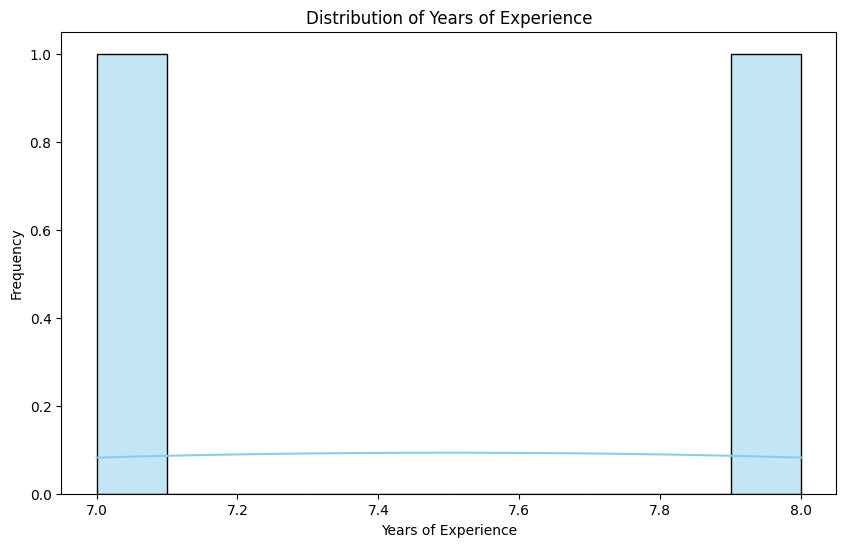

<ipython-input-8-983d4e35f7fa>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_counts.head(10).values, y=skill_counts.head(10).index, palette='viridis')


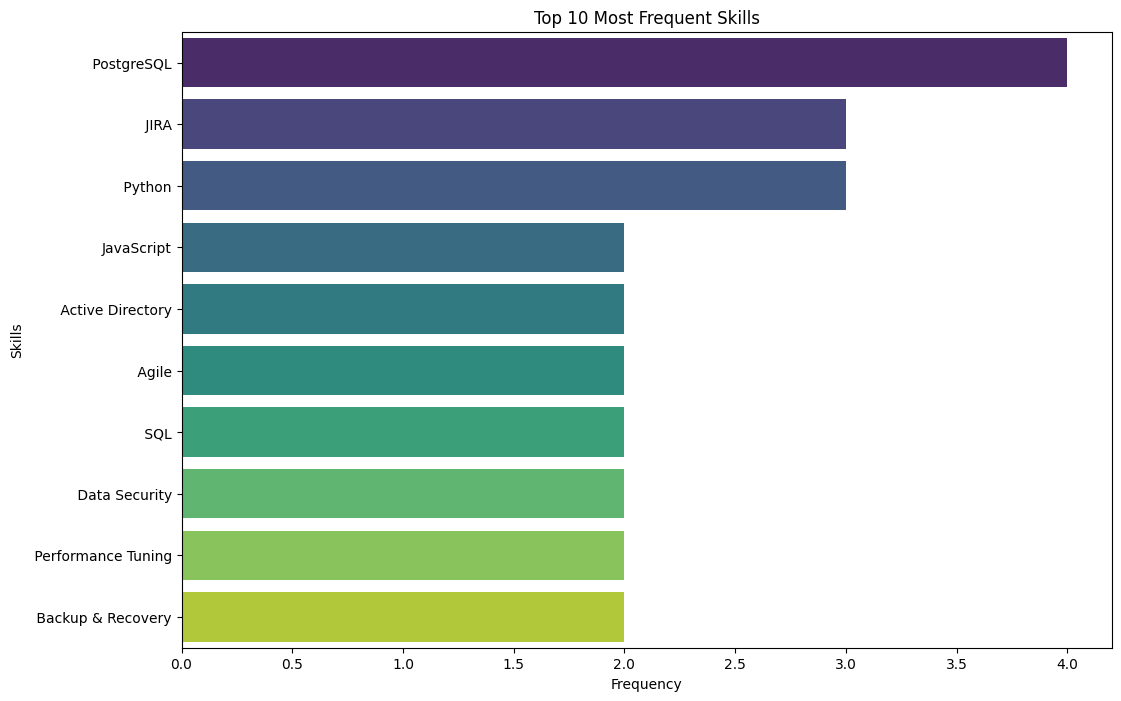

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

class ResumeAnalyzer:
    def __init__(self, data_path):
        """INITIALIZE THE RESUMEANALYZER WITH THE DATASET."""
        self.data = pd.read_excel(data_path)



    def experience_distribution(self):
        """PLOT THE DISTRIBUTION OF YEARS OF EXPERIENCE ACCURATELY."""
        def extract_experience(exp):
            if pd.isnull(exp):
                return np.nan
            # PATTERNS FOR VARIOUS FORMATS OF EXPERIENCE
            experience_match = re.search(r'\d+\+?\s*year', exp, re.IGNORECASE)
            if experience_match:
                exp = experience_match.group(0)
                if '-' in exp:
                    return float(exp.split('-')[0])
                # IF EXPERIENCE CONTAINS "LESS THAN A YEAR" OR SIMILAR
                elif 'less' in exp.lower() or 'fresher' in exp.lower():
                    return 0.0
                else:
                    # EXTRACT NUMBERS INCLUDIND DECIMAL PART
                    return float(re.findall(r'\d*\.?\d+', exp)[0])
            else:
                return np.nan

        # APPLY THE EXTRACTION FUNCTION TO THE 'EXPERIENCE' COLUMN
        self.data['Years_of_Experience'] = self.data['Experience'].apply(extract_experience)

        # DROPPING ROWS WITH NA VALUES
        experience_data = self.data['Years_of_Experience'].dropna()

        # PLOTTING THE DISTRIBUTION
        plt.figure(figsize=(10, 6))
        sns.histplot(experience_data, bins=10, kde=True, color='skyblue')
        plt.title('Distribution of Years of Experience')
        plt.xlabel('Years of Experience')
        plt.ylabel('Frequency')
        plt.show()

    def skills_frequency(self):
        """PLOT THE FREQUENCY OF DIFFERENT SKILLS."""
        all_skills = self.data['Skills'].dropna().str.split(',').sum()
        skill_counts = pd.Series(all_skills).value_counts()

        # PLOTTING THE TOP 10 MOST FREQUENT SKILLS
        plt.figure(figsize=(12, 8))
        sns.barplot(x=skill_counts.head(10).values, y=skill_counts.head(10).index, palette='viridis')
        plt.title('Top 10 Most Frequent Skills')
        plt.xlabel('Frequency')
        plt.ylabel('Skills')
        plt.show()


# OUTPUT
analyzer = ResumeAnalyzer("/content/drive/MyDrive/resume_data.xlsx")
analyzer.experience_distribution()
analyzer.skills_frequency()

# PYTHON SCRIPT THAT USES THE XGBOOST ALGORITHM TO PREDICT THE PRIMARY SKILL OF A RESUME BASED ON ITS CONTENT


In [ ]:
!pip install xgboost
!pip install openpyxl

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pickle


class ResumeSkillPredictor:
    def __init__(self, data_file):
        """INITIALIZE THE RESUMESKILLPREDICTOR WITH THE DATASET."""
        self.data_file = data_file
        self.model = None
        self.vectorizer = TfidfVectorizer()

    def load_data(self):
        """LOAD THE RESUME DATA"""
        self.data = pd.read_excel(self.data_file)
        print("Data loaded successfully.")

    def preprocess_data(self):
        """PREPROCESS THE DATA FOR MODEL TRAINING."""
        # CREATING A 'CONTENT' COLUMN BY COMBINING RELEVANT DATA
        self.data['Content'] = self.data['Skills'].fillna('') + ' ' + \
            self.data['Experience'].fillna('') + ' ' + \
            self.data['Education'].fillna('')

        X = self.data['Content']
        y = self.data['Skills']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42)
        print("Data preprocessed successfully.")

    def feature_extraction(self):
        """EXTRACT FEATURES USING TF-IDF VECTORIZATION."""
        self.X_train_tfidf = self.vectorizer.fit_transform(self.X_train)
        self.X_test_tfidf = self.vectorizer.transform(self.X_test)
        print("Features extracted successfully.")

    def train_model(self):
        """TRAIN THE XGBOOST MODEL."""
        self.le = LabelEncoder()
        # FIT AND TRANSFORM Y_TRAIN
        self.y_train = self.le.fit_transform(self.y_train)
        self.model = xgb.XGBClassifier(
            use_label_encoder=False, eval_metric='mlogloss')
        self.model.fit(self.X_train_tfidf, self.y_train)
        print("Model trained successfully.")

    def evaluate_model(self):
        """EVALUATE THE MODEL'S PERFORMANCE."""
        y_pred = self.model.predict(self.X_test_tfidf)
        # INVERSE TRANSFORM THE PREDICTED LABELS
        y_pred = self.le.inverse_transform(y_pred)
        accuracy = accuracy_score(self.y_test, y_pred)
        print(f"Model accuracy: {accuracy:.2f}")

    def save_model(self, model_file):
        """SAVE THE TRAINED MODEL TO A FILE."""
        with open(model_file, 'wb') as f:
            pickle.dump(self.model, f)
        with open('vectorizer.pkl', 'wb') as f:
            pickle.dump(self.vectorizer, f)
        with open('label_encoder.pkl', 'wb') as f:
            pickle.dump(self.le, f)
        print("Model saved successfully.")

    def load_model(self, model_file):
        """LOAD A TRAINED MODEL FROM A FILE."""
        with open(model_file, 'rb') as f:
            self.model = pickle.load(f)
        with open('vectorizer.pkl', 'rb') as f:
            self.vectorizer = pickle.load(f)
        with open('label_encoder.pkl', 'rb') as f:
            self.le = pickle.load(f)
        print("Model loaded successfully.")

    def predict(self, new_resume):
        """PREDICT THE PRIMARY SKILL FOR A NEW RESUME."""
        new_resume_tfidf = self.vectorizer.transform([new_resume])
        prediction = self.model.predict(new_resume_tfidf)
        prediction = self.le.inverse_transform(prediction)
        return prediction[0]

# OUTPUT
predictor = ResumeSkillPredictor(
data_file='/content/drive/MyDrive/resume_data.xlsx')

In [ ]:
predictor = ResumeSkillPredictor(data_file='/content/drive/MyDrive/resume_data.xlsx')  # Change to your Excel file
predictor.load_data()

# CHECK IF DATA LOADED CORRECTLY
print(predictor.data.head())
predictor.preprocess_data()
predictor.feature_extraction()
predictor.train_model()
predictor.evaluate_model()

# PREDECTING A NEW RESUME
new_resume_content = "Experienced software engineer with skills in Python, Java, and machine learning."
predicted_skill = predictor.predict(new_resume_content)
print(f"The predicted primary skill is: {predicted_skill}")


Data loaded successfully.
              Name                    Email           Phone  \
0         John Doe      johndoe@example.com  (312) 555-0123   
1        Sarah Lee     sarahlee@example.com  (512) 555-0145   
2  Michael Johnson     michaelj@example.com  (720) 555-0198   
3   Emma Rodriguez      emmarod@example.com  (206) 555-0223   
4      David Smith  david.smith@example.com  (415) 555-0334   

                                              Skills  \
0  JavaScript, Python, React, Node.js, PostgreSQL...   
1  SQL, Python, Power BI, Tableau, Excel, R, Data...   
2  Windows OS, Mac OS, Active Directory, Networki...   
3  Windows Server, Linux, VMware, Active Director...   
4  Cisco Networking, VPN, Firewalls, Network Secu...   

                                          Experience  \
0  in building web applications and backend servi...   
1  using SQL, Python, and Power BI to provide act...   
2  providing technical support, troubleshooting h...   
3  in managing, configuring, and m

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:52:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


https://colab.research.google.com/drive/1AXZAgOzQ-rfVfxx05ZzMFipk2PV2LYdp?usp=sharing